<h3><font color="black">ECE 2195 HW4 Problem 1</font></h3>

Inputs [A, B]:  [0, 0]
Input Layer Output:  [-20, -20]
Hidden Layer Output:  [-30.0]
Final Normalized Output:  [0.]


Inputs [A, B]:  [0, 1]
Input Layer Output:  [60, -100]
Hidden Layer Output:  [20.0]
Final Normalized Output:  [1.]


Inputs [A, B]:  [1, 0]
Input Layer Output:  [-100, 60]
Hidden Layer Output:  [20.0]
Final Normalized Output:  [1.]


Inputs [A, B]:  [1, 1]
Input Layer Output:  [-20, -20]
Hidden Layer Output:  [-30.0]
Final Normalized Output:  [0.]




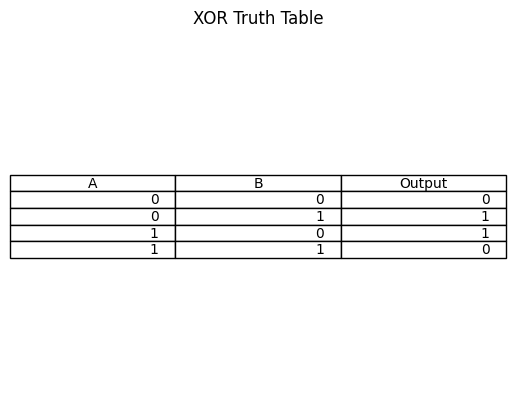

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Define XOR = OR[AND(!A,B) + AND(A,!B)]
def main(inputs):
    print("Inputs [A, B]: ", inputs)

    # Initialize weights for each layer and a corresponding list
    theta1 = 80
    theta2 = 50
    weights_input = [theta1, theta1]
    weights_hidden = [theta2, theta2]

    # Initialize biases
    bias_and = -100
    bias_or = -30

    # Call the input layer and store the output
    inputs_hidden = input_layer(bias_and, inputs, weights_input)

    # Check the output from the input layer
    print("Input Layer Output: ", inputs_hidden)

    # Normalize the data output from the input layer in order to send to the hidden layer
    hidden_array = np.array(inputs_hidden)
    hidden_normalized = np.zeros(hidden_array.shape)
    hidden_normalized[hidden_array > 0] = 1
    hidden_normalized[hidden_array < 0] = 0

    # Call the hidden layer and get store the output
    outputs = hidden_layer(bias_or, hidden_normalized, weights_hidden)

    # Check the output from the hidden layer
    print("Hidden Layer Output: ", outputs)

    # Normalize the data output from the hidden layer in order to check if our XOR gate works
    out_array = np.array(outputs)
    outputs_normalized = np.zeros(out_array.shape)
    outputs_normalized[out_array > 0] = 1
    outputs_normalized[out_array < 0] = 0

    # Check the normalized output
    print("Final Normalized Output: ", outputs_normalized)
    print("\n")

    # Create an array to return and plot a truth table
    outputs_array = np.array(inputs)
    outputs_array = np.append(outputs_array, int(outputs_normalized))
    return outputs_array


# For the input layer we return AND(!A,B) and AND(A,!B)
def input_layer(bias, inputs, weights):
    outs = []
    for i in range(2):
        temp = not inputs[i]
        if i == 0:
            out = bias + temp * weights[i] + inputs[i + 1] * weights[i + 1]
        if i == 1:
            out = bias + inputs[i - 1] * weights[i - 1] + temp * weights[i]
        outs.append(out)

    return outs


# For the hidden layer we return OR(A,B)
def hidden_layer(bias, inputs, weights):
    outs = []
    for i in range(1):
        out = bias + inputs[i] * weights[i] + inputs[i + 1] * weights[i + 1]
        outs.append(out)

    return outs


# Initialize list of all possible input combinations
inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]
# Initialize empty list for data to populate truth table
data = []

# Iterate over the main function to test all input combinations
for i in enumerate(inputs):
    data.append(main(i[1]))

plt.title("XOR Truth Table")
columns = ("A", "B", "Output")
plt.axis('off')
the_table = plt.table(cellText=data, colLabels=columns, loc='center')
plt.show()

<h3><font color="black">ECE 2195 HW4 Problem 2</font></h3>

x_train shape: (60000, 784)
Number of images in x_train 60000
Number of images in x_test 10000


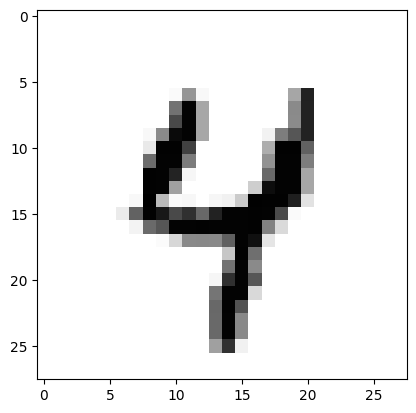

In [3]:
# Problem 2: MNIST Classification using a Multi Layer Perceptron

# Import numpy, Tensorflow and Keras to build and run a custom ANN
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Get the MNIST dataset from Keras for training and testing; x - input image, y - output label
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape the input data to fit the Keras ANN model - (Nsamples, 28, 28) is converted to (Nsamples, 28*28)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

# Check sample image - change index to try different inputs
image_index = 1111
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')

<h5><font color="black">Part 1: Adjust number of nodes/activation layer and make the model.</font></h5>

In [4]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Activation

# Creating a list Sequential Models and add the layers - hidden and output
model = [Sequential(), Sequential(), Sequential(), Sequential(), Sequential(), Sequential()]

# Initialize
i = 0

# Add 1st hidden layer for different training models and set activation layer
for hidden_nodes in [16, 32, 64]:
    for act_layer in ['relu', 'sigmoid']:
        print(f'Model with {hidden_nodes} nodes and {act_layer} activation...')
        print(f'Model {i}')
        model[i].add(Dense(hidden_nodes, input_dim=784, activation=act_layer))
        
        # Print summary of model built - look at number of parameters needed; more params -> more resources
        model[i].summary()
        print('\n')

        # randomly drop few connections - to reduce memory and may improve accuracy 
        model[i].add(Dropout(0.2))

        # Output layer - 10 nodes for 10 output lables 0,1,...,9
        model[i].add(Dense(10, activation=tf.nn.softmax))
        
        # Increment
        i += 1

Model with 16 nodes and relu activation...
Model 0
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
Total params: 12,560
Trainable params: 12,560
Non-trainable params: 0
_________________________________________________________________


Model with 16 nodes and sigmoid activation...
Model 1
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                12560     
                                                                 
Total params: 12,560
Trainable params: 12,560
Non-trainable params: 0
_________________________________________________________________


Model with 32 nodes and relu activation...
Model 

<h5><font color="black">Train the model iteratively.</font></h5>

In [5]:
history = [Sequential(), Sequential(), Sequential(), Sequential(), Sequential(), Sequential()] 

for i in range(6):
    print(f'Training Model {i}...')
    
    # Compile the ANN models with specific optimizer, loss function and performance metric
    # optimizer = sgd for stochastic gradient descent, OR adam - 
    model[i].compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

    # Train the ANN models iteratively for N epochs 
    n_epochs = 10
    history[i] = model[i].fit(x=x_train,y=y_train, epochs=n_epochs)
    print('\n')

Training Model 0...
Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.4167 - accuracy: 0.2224
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7568 - accuracy: 0.3512
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6051 - accuracy: 0.3954
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4628 - accuracy: 0.4360
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3772 - accuracy: 0.4807
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3125 - accuracy: 0.5124
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2546 - accuracy: 0.5454
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2192 - accuracy: 0.5718
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1721 - accuracy: 0.5985
Epoch 10/10
1875/1875 [==============================] - 7s 4m

<h5><font color="black">Part 2: Determine which network gives the best prediction accuracy for the training/testing datasets.</font></h5>

Model 0 Results...
313/313 [==============================] - 1s 3ms/step - loss: 0.8051 - accuracy: 0.7921
Test accuracy: 0.7921000123023987
1/1 [==============================] - 0s 31ms/step

Prediction: 4


Model 1 Results...
313/313 [==============================] - 1s 3ms/step - loss: 0.4160 - accuracy: 0.8764
Test accuracy: 0.8763999938964844
1/1 [==============================] - 0s 32ms/step

Prediction: 4


Model 2 Results...
313/313 [==============================] - 1s 3ms/step - loss: 0.4677 - accuracy: 0.8765
Test accuracy: 0.8765000104904175
1/1 [==============================] - 0s 32ms/step

Prediction: 4


Model 3 Results...
313/313 [==============================] - 1s 3ms/step - loss: 0.3270 - accuracy: 0.9021
Test accuracy: 0.9021000266075134
1/1 [==============================] - 0s 44ms/step

Prediction: 4


Model 4 Results...
313/313 [==============================] - 1s 3ms/step - loss: 0.3267 - accuracy: 0.9371
Test accuracy: 0.9370999932289124
1/1 [=========

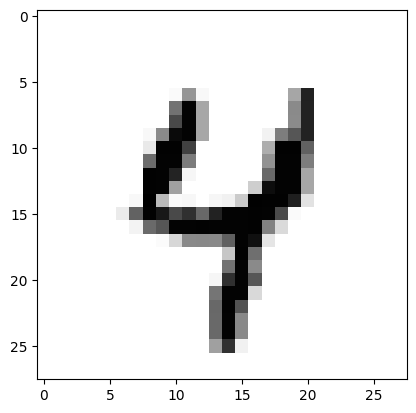

In [8]:
# Evaluate models
for i in range(6):
    print(f'Model {i} Results...')

    # Evaluate the ANN model with the test samples
    score = model[i].evaluate(x_test, y_test)
    print('Test accuracy:', score[1])

    # Check the ANN with an example
    image_index = 1111
    plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
    pred = model[i].predict(x_test[image_index].reshape(1,28*28))
    print('\nPrediction:', pred.argmax())
    print('\n')
    if i == 5:
        print('Actual input')

<h5><font color="black">Comment: Model 4, which is the model with 64 nodes and the ReLu activation layer gives the best results. The accuracy is around %93 (when I ran it)! The ReLu activation layer gave the training model an increased average accuracy when the amount of nodes increased. Increasing the number of nodes increases the accuracy of the datasets but also increases the time to train it.</font></h5>

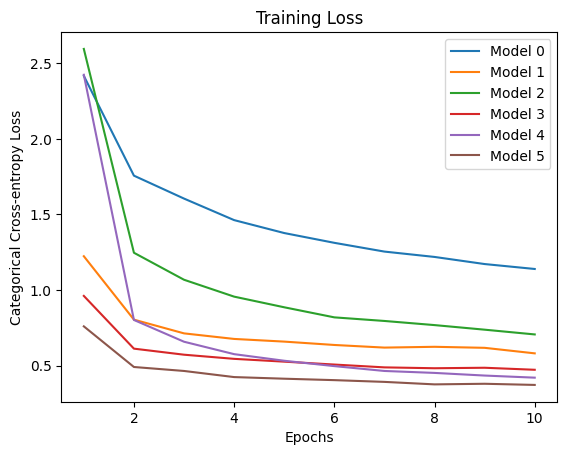

In [7]:
# Plot the Training Loss - loss should decrease and approach 0 with number of epochs
for i in range(6):
    x = list(range(1, n_epochs+1))
    ty = history[i].history['loss']
    plt.plot(x,ty)
    
plt.title(f'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Cross-entropy Loss')
plt.legend(['Model 0', 'Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'])
plt.show()

<h5><font color="black">Part 3: Two concepts that emerge from neural networks are underfitting and overfitting. Underfitting being the result of too few nodes and overfitting being the result of too many. When a model is underfit, our accuracy decreases because there are not enough nodes to accurately detect signals. When a model is overfit, the time it takes to train a model increases due to the amount of nodes.</font></h5>

<h5><font color="black">Part 4: If we increase the number of hidden layers in the ANN, the time to train the models will increase. That said, increasing the number of hidden layers is a great techinique for training a model at various layers of abstraction and generalizing a problem set (deep learning).</font></h5>